# fake news classifier using Natural Language Processing.

# Loading necessary libraries


In [3]:
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Reading the data

In [6]:
df=pd.read_csv('train.csv')

In [7]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [8]:
df.shape
# There are 20800 rows and 5 columns

(20800, 5)

In [9]:
df['label'].value_counts()
# There are 10413 'ones' and 10387 'zeroes' in the dataframe

label
1    10413
0    10387
Name: count, dtype: int64

In [10]:
df.isnull().sum()
# There are few null values present in the dataset

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
df=df.dropna()
# The null values are removed using the dropna function

In [12]:
df.isnull().sum()
# As seen below there are no null values present in the dataframe now.

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [13]:
df.reset_index(inplace=True)
# As we can see in the output, the Series. reset_index() function has reset the index of the given Series.

In [14]:
df

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [15]:
import re
import string

## Text cleaning

In [16]:
# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
df['text'] = df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [17]:
df['text']

0        house dem aide  we didn t even see comey s let...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october     ...
3        videos   civilians killed in single us airstri...
4        print  an iranian woman has been sentenced to ...
                               ...                        
18280    rapper t  i  unloaded on black celebrities who...
18281    when the green bay packers lost to the washing...
18282    the macy s of today grew from the union of sev...
18283    nato  russia to hold parallel exercises in bal...
18284      david swanson is an author  activist  journa...
Name: text, Length: 18285, dtype: object

## Removing stop words and stemming the text

In [25]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [29]:
file = open('preprocessed_text.txt','w')
file.writelines(corpus)
file.close()

## Splitting the dataframe

In [18]:
Y=df['label']
# We select the label column as Y

In [19]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

## Making train and test data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], Y, test_size=0.30, random_state=40)

### Tfidf vectorizer

In [21]:
#Applying tfidf to the data set
tfidf_vect = TfidfVectorizer(stop_words = 'english',max_df=0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [22]:
print(tfidf_test)

  (0, 116553)	0.03886548223169257
  (0, 115702)	0.02577799575708681
  (0, 115692)	0.00904800329154621
  (0, 114895)	0.009673419081344278
  (0, 114861)	0.016618616020114874
  (0, 114848)	0.010562420147987915
  (0, 113165)	0.013935134858730162
  (0, 113110)	0.016117563226566926
  (0, 113013)	0.027915866741656793
  (0, 112960)	0.0187879083094958
  (0, 112621)	0.014233357454810993
  (0, 112502)	0.033848840233184616
  (0, 112472)	0.018913078792303722
  (0, 111638)	0.022574963902960127
  (0, 111149)	0.03305268263185922
  (0, 110726)	0.030170078331103658
  (0, 110466)	0.011808060706868613
  (0, 110343)	0.03305268263185922
  (0, 110196)	0.017882582744640885
  (0, 108797)	0.0201639418741461
  (0, 107753)	0.0445860293134556
  (0, 107752)	0.0445860293134556
  (0, 107301)	0.026722385232109524
  (0, 106653)	0.04142088061358076
  (0, 106336)	0.015087881216580364
  :	:
  (5485, 14393)	0.030676892638861704
  (5485, 13981)	0.03850878930619704
  (5485, 13630)	0.05358526389326042
  (5485, 11899)	0.037197

In [23]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vect.get_feature_names_out()[-10:])

['zwrocie' 'zwrotu' 'zwyci' 'zxycmwjdxj' 'zyaratgah' 'zygankow'
 'zylinderkopfdichtung' 'zynga' 'zytsov' 'zyuganov']


### Count vectorizer

In [24]:
count_vect = CountVectorizer(stop_words = 'english')
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

In [25]:
print(count_test)

  (0, 57)	1
  (0, 807)	1
  (0, 1146)	1
  (0, 1150)	2
  (0, 1164)	1
  (0, 1812)	1
  (0, 1947)	1
  (0, 2541)	1
  (0, 2646)	1
  (0, 3505)	4
  (0, 3882)	2
  (0, 4948)	1
  (0, 5342)	1
  (0, 5768)	1
  (0, 6331)	1
  (0, 6941)	1
  (0, 6948)	1
  (0, 7269)	1
  (0, 8868)	1
  (0, 8874)	1
  (0, 8878)	3
  (0, 9309)	1
  (0, 9457)	9
  (0, 9503)	2
  (0, 9718)	1
  :	:
  (5485, 100570)	1
  (5485, 102087)	1
  (5485, 103139)	1
  (5485, 103332)	1
  (5485, 104069)	1
  (5485, 104142)	1
  (5485, 104480)	1
  (5485, 104552)	1
  (5485, 104782)	1
  (5485, 104912)	2
  (5485, 105867)	5
  (5485, 106262)	1
  (5485, 107691)	1
  (5485, 108797)	1
  (5485, 108839)	4
  (5485, 109772)	1
  (5485, 111259)	1
  (5485, 111530)	2
  (5485, 113165)	1
  (5485, 113823)	1
  (5485, 114711)	1
  (5485, 114723)	1
  (5485, 115134)	1
  (5485, 115692)	1
  (5485, 116007)	1


In [26]:
# Get the feature names of `count_vectorizer` 
print(count_vect.get_feature_names_out()[0:10])

['aa' 'aaa' 'aaah' 'aaahhh' 'aaajiao' 'aaany' 'aaas' 'aab' 'aabb' 'aac']


## Machine learning

# 1. Naive Bayes model

### TF-Idf vectorized 

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [42]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(tfidf_train, Y_train)                       
pred = clf.predict(tfidf_test)                     
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
print(cm)

accuracy:   0.772
[[3103    8]
 [1243 1132]]


In [43]:
print('Wrong predictions out of total')
print((Y_test !=pred).sum(),'/',((Y_test == pred).sum()+(Y_test != pred).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred))

Wrong predictions out of total
1251 / 5486
Percentage accuracy:  77.19650018228216


In [44]:
# Plotting confusion matrix for TF-Idf vectorizer

<Axes: >

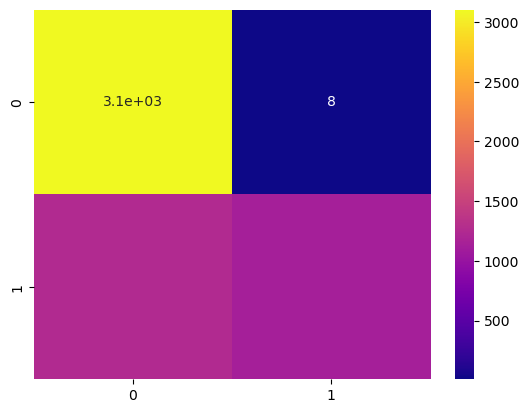

In [45]:
sns.heatmap(cm, cmap="plasma", annot=True)

### Count Vectorized

In [46]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(count_train, Y_train)                       
pred1 = clf.predict(count_test)                    
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y_test, pred1)
print(cm2)

accuracy:   0.903
[[2977  134]
 [ 397 1978]]


In [47]:
print('Wrong predictions out of total')
print((Y_test !=pred1).sum(),'/',((Y_test == pred1).sum()+(Y_test != pred1).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred1))

Wrong predictions out of total
531 / 5486
Percentage accuracy:  90.32081662413415


In [48]:
# Plotting confusion matrix for Count vectorizer.

<Axes: >

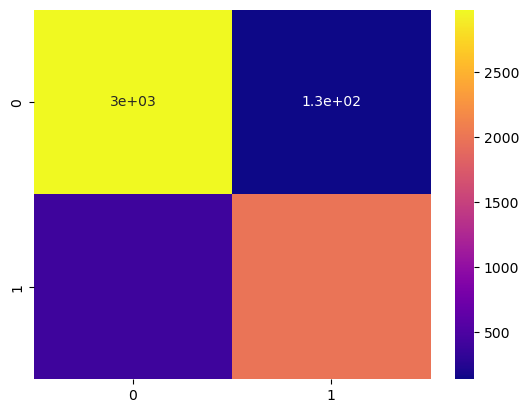

In [49]:
sns.heatmap(cm2, cmap="plasma", annot=True)

# 2. Random Forest Model

In [50]:
from sklearn.ensemble import RandomForestClassifier

### TF-Idf Vectorized

In [51]:
RF=RandomForestClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds2 = RF.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = RF.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

Model accuracy on train is:  0.9999218688960075
Model accuracy on test is:  0.9022967553773241
--------------------------------------------------
confusion_matrix train is:  [[7249    1]
 [   0 5549]]
confusion_matrix test is:  [[3031   80]
 [ 456 1919]]
Wrong predictions out of total
--------------------------------------------------
536 / 5486
--------------------------------------------------


### Count Vectorized

In [52]:
RF=RandomForestClassifier().fit(count_train,Y_train)
#predict on train 
train_preds3 = RF.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = RF.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

Model accuracy on train is:  0.9999218688960075
Model accuracy on test is:  0.9012030623405031
--------------------------------------------------
confusion_matrix train is:  [[7249    1]
 [   0 5549]]
confusion_matrix test is:  [[3047   64]
 [ 478 1897]]
Wrong predictions out of total
--------------------------------------------------
542 / 5486
--------------------------------------------------


# K-Nearest Neighbour

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds4 = KNN.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = KNN.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)

Model accuracy on train is:  0.5156652863504961
Model accuracy on test is:  0.48505286183011304
--------------------------------------------------


In [30]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))

print('-'*50)

confusion_matrix train is:  [[1067 6183]
 [  16 5533]]
confusion_matrix test is:  [[ 296 2815]
 [  10 2365]]
Wrong predictions out of total
--------------------------------------------------
2825 / 5486
--------------------------------------------------


In [31]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(count_train,Y_train)
#predict on train 
train_preds5 = KNN.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

Model accuracy on train is:  0.7850613329166342
Model accuracy on test is:  0.7320452059788553
--------------------------------------------------


In [32]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

print('-'*50)

confusion_matrix train is:  [[4680 2570]
 [ 181 5368]]
confusion_matrix test is:  [[1770 1341]
 [ 129 2246]]
Wrong predictions out of total
--------------------------------------------------
1470 / 5486
--------------------------------------------------
